In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

%matplotlib inline

In [4]:
ruloni_df = pd.read_csv("../data/Ruloni.csv")
test_df = pd.read_csv("../data/Test.csv")
valki_df = pd.read_csv("../data/Valki.csv")
zavalki_df = pd.read_csv("../data/Zavalki.csv")

In [8]:
ruloni_df.head()

,Марка,Масса,Толщина,Ширина,Время_обработки
0,Марка стали 22,27.26,2.9,1314,2018-01-01 00:14:45
1,Марка стали 109,21.62,3.8,1415,2018-01-01 00:16:58
2,Марка стали 109,22.78,3.8,1415,2018-01-01 00:19:06
3,Марка стали 109,13.76,3.8,1415,2018-01-01 00:21:21
4,Марка стали 109,27.21,3.8,1415,2018-01-01 00:21:59


In [22]:
ruloni_df.tail()

,Марка,Масса,Толщина,Ширина,Время_обработки
269962,Марка стали 22,26.00,3.2,1265,2018-12-31 23:49:31
269963,Марка стали 105,10.48,3.0,1060,2018-12-31 23:51:08
269964,Марка стали 105,21.78,3.0,1060,2018-12-31 23:53:24
269965,Марка стали 105,21.88,3.0,1060,2018-12-31 23:55:55
269966,Марка стали 105,30.56,3.0,1060,2018-12-31 23:58:29


In [14]:
len(set(ruloni_df["Марка"]))

99

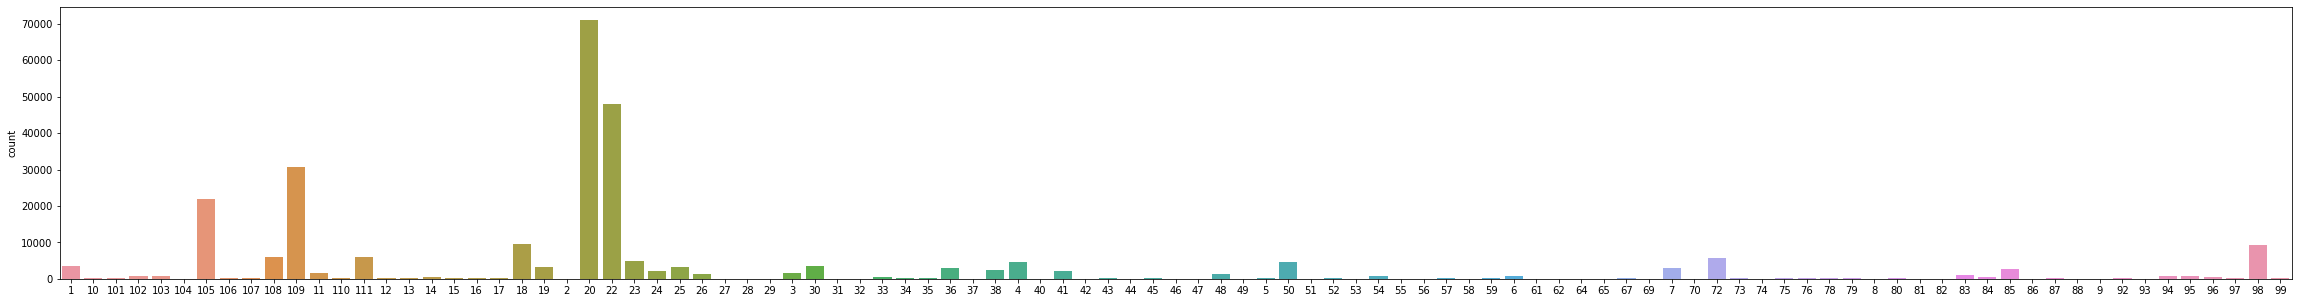

In [99]:
plt.figure(figsize=[40, 5])
sns.countplot(sorted(ruloni_df["Марка"].map(lambda x: x.split(" ")[-1])))

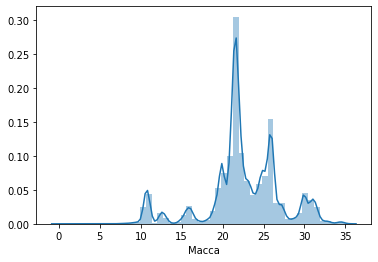

In [16]:
sns.distplot(ruloni_df["Масса"])

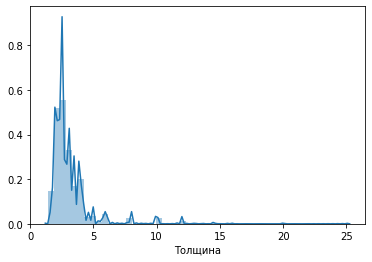

In [19]:
sns.distplot(ruloni_df["Толщина"])

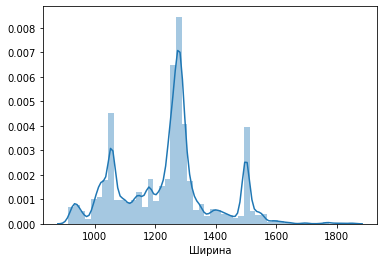

In [20]:
sns.distplot(ruloni_df["Ширина"])

In [24]:
zavalki_df.tail()

,дата_завалки,дата_вывалки,номер_клетки,положение_в_клети,номер_валка,износ
18075,2018-10-01 14:59:50,2018-10-01 18:04:14,9,низ,198,0.533407
18076,2018-10-01 14:59:50,2018-10-01 18:04:14,9,верх,211,0.545309
18077,2018-10-01 14:59:50,2018-10-01 18:04:14,8,низ,310,0.938196
18078,2018-10-01 14:59:50,2018-10-01 18:04:14,8,верх,68,0.646028
18079,2018-10-01 14:59:50,2018-10-01 18:04:14,10,верх,144,0.714400


In [25]:
zavalki_df.iloc[6000]

дата_завалки         2018-04-02 03:03:29
дата_вывалки         2018-04-02 06:32:50
номер_клетки                          12
положение_в_клети                   верх
номер_валка                           78
износ                           0.675131
Name: 6000, dtype: object

In [23]:
test_df.sort_values("дата_завалки").head()

,id,дата_завалки,дата_вывалки,номер_клетки,положение_в_клети,номер_валка
0,0,2018-10-01 18:15:54,2018-10-01 21:46:56,12,низ,199
1,1,2018-10-01 18:15:54,2018-10-01 21:46:56,12,верх,445
2,2,2018-10-01 18:15:54,2018-10-01 21:46:56,11,верх,284
3,3,2018-10-01 18:15:54,2018-10-01 21:46:56,10,низ,172
4,4,2018-10-01 18:15:54,2018-10-01 21:46:56,11,низ,275


In [29]:
test_df.shape

(6060, 6)

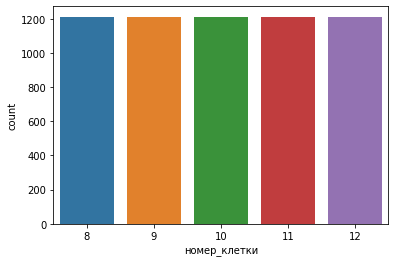

In [23]:
sns.countplot(test_df["номер_клетки"])

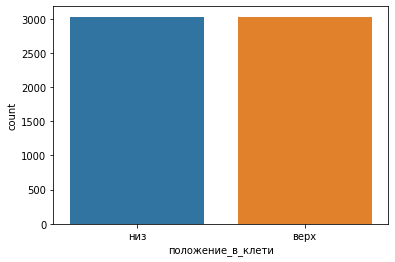

In [25]:
sns.countplot(test_df["положение_в_клети"])

In [5]:
valki_df.head()

,материал_валка,номер_валка
0,Материал валка 1,1
1,Материал валка 1,2
2,Материал валка 2,3
3,Материал валка 3,4
4,Материал валка 4,5


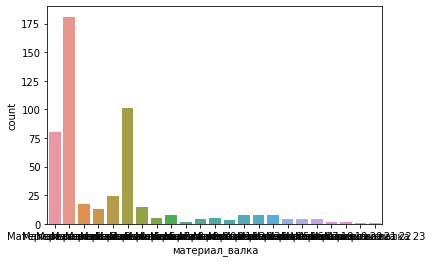

In [6]:
sns.countplot(valki_df["материал_валка"])

In [36]:
from collections import Counter

In [37]:
cnt = Counter(valki_df["материал_валка"])

In [38]:
cnt

Counter({'Материал валка 1': 80,
         'Материал валка 2': 181,
         'Материал валка 3': 17,
         'Материал валка 4': 13,
         'Материал валка 5': 24,
         'Материал валка 6': 101,
         'Материал валка 7': 15,
         'Материал валка 8': 5,
         'Материал валка 9': 8,
         'Материал валка 10': 2,
         'Материал валка 11': 4,
         'Материал валка 12': 5,
         'Материал валка 13': 3,
         'Материал валка 14': 8,
         'Материал валка 15': 8,
         'Материал валка 16': 8,
         'Материал валка 17': 4,
         'Материал валка 18': 4,
         'Материал валка 19': 4,
         'Материал валка 20': 2,
         'Материал валка 21': 2,
         'Материал валка 22': 1,
         'Материал валка 23': 1})

In [26]:
len(set(valki_df["материал_валка"]))

23

In [27]:
len(valki_df)

500

In [5]:
zavalki_df.query("износ == 0")

,дата_завалки,дата_вывалки,номер_клетки,положение_в_клети,номер_валка,износ
171,2018-01-03 12:35:02,2018-01-03 15:58:05,12,верх,224,0.0
552,2018-01-09 09:19:44,2018-01-09 12:21:14,12,верх,392,0.0
663,2018-01-11 00:22:44,2018-01-11 03:30:42,12,верх,490,0.0
692,2018-01-11 11:17:06,2018-01-11 14:22:21,12,верх,99,0.0
761,2018-01-12 12:12:28,2018-01-12 15:11:51,12,верх,131,0.0
900,2018-01-14 15:06:20,2018-01-14 18:40:39,12,верх,267,0.0
1094,2018-01-17 13:11:08,2018-01-17 16:13:50,12,низ,248,0.0
1163,2018-01-18 14:40:31,2018-01-18 17:53:01,11,верх,109,0.0
1271,2018-01-20 06:23:17,2018-01-20 09:41:40,12,верх,384,0.0
1321,2018-01-21 00:26:25,2018-01-21 03:16:43,12,верх,278,0.0


In [6]:
set(ruloni_df["Марка"])

{'Марка стали 1',
 'Марка стали 10',
 'Марка стали 101',
 'Марка стали 102',
 'Марка стали 103',
 'Марка стали 104',
 'Марка стали 105',
 'Марка стали 106',
 'Марка стали 107',
 'Марка стали 108',
 'Марка стали 109',
 'Марка стали 11',
 'Марка стали 110',
 'Марка стали 111',
 'Марка стали 12',
 'Марка стали 13',
 'Марка стали 14',
 'Марка стали 15',
 'Марка стали 16',
 'Марка стали 17',
 'Марка стали 18',
 'Марка стали 19',
 'Марка стали 2',
 'Марка стали 20',
 'Марка стали 22',
 'Марка стали 23',
 'Марка стали 24',
 'Марка стали 25',
 'Марка стали 26',
 'Марка стали 27',
 'Марка стали 28',
 'Марка стали 29',
 'Марка стали 3',
 'Марка стали 30',
 'Марка стали 31',
 'Марка стали 32',
 'Марка стали 33',
 'Марка стали 34',
 'Марка стали 35',
 'Марка стали 36',
 'Марка стали 37',
 'Марка стали 38',
 'Марка стали 4',
 'Марка стали 40',
 'Марка стали 41',
 'Марка стали 42',
 'Марка стали 43',
 'Марка стали 44',
 'Марка стали 45',
 'Марка стали 46',
 'Марка стали 47',
 'Марка стали 48',
 'Мар

In [19]:
zavalki_df.iloc[16253]

дата_завалки         2018-09-04 07:40:03
дата_вывалки         2018-09-04 11:15:31
номер_клетки                          11
положение_в_клети                   верх
номер_валка                          295
износ                           0.369591
Name: 16253, dtype: object

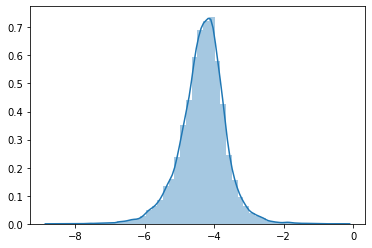

In [151]:
sns.distplot(np.log10(np.diff(sorted(set(zavalki_df["износ"])))))

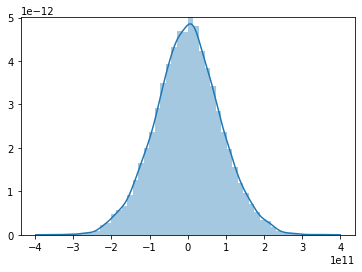

In [18]:
sns.distplot(np.diff(zavalki_df["износ"], n=40))

In [150]:
sorted(set(zavalki_df["износ"]))

[0.0,
 0.002110686842635212,
 0.002224571192187441,
 0.0023360597167817465,
 0.00875498346167658,
 0.00978272544690828,
 0.010668814680519223,
 0.01225851452502974,
 0.012907207274302168,
 0.013733669146424043,
 0.01410692689379095,
 0.015341472742888771,
 0.01663441739029681,
 0.016901486690765966,
 0.018199854681037964,
 0.01996219385311232,
 0.02066292397062386,
 0.0212436510712366,
 0.02201757404645005,
 0.022444279034553486,
 0.02353086651338609,
 0.024255451074216842,
 0.02456389571343576,
 0.025030681583051658,
 0.026251161565687298,
 0.02735004467335356,
 0.028876346530387342,
 0.03193801356794157,
 0.0341468962011256,
 0.034483677118716693,
 0.0345823828194215,
 0.03518627464258367,
 0.03582091274490273,
 0.0360196989352245,
 0.03604170170870491,
 0.03783591549093246,
 0.03808951321364274,
 0.03809398947313297,
 0.038314643539936966,
 0.03882790476432413,
 0.03933488576480998,
 0.03985217113994055,
 0.03995017250640276,
 0.04077620211533611,
 0.04105035755486292,
 0.0414243904

In [28]:
zavalki_df.shape

(18080, 6)

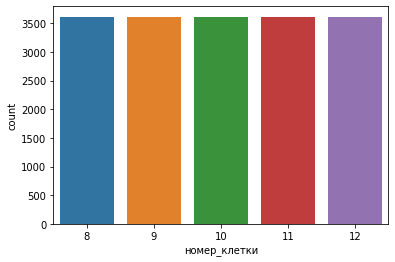

In [32]:
sns.countplot(zavalki_df["номер_клетки"])

In [29]:
zavalki_df["month"] = zavalki_df["дата_завалки"].map(lambda x: pd.to_datetime(x).month)

In [39]:
zavalki_df.groupby("month")["износ"].apply(np.mean)

month
1     0.796386
2     0.859847
3     0.839960
4     0.848621
5     0.818421
6     0.831334
7     0.842074
8     0.805036
9     0.858163
10    0.825256
Name: износ, dtype: float64

In [40]:
zavalki_df.groupby("month")["износ"].apply(np.std)

month
1     0.344556
2     0.422440
3     0.399597
4     0.385356
5     0.394834
6     0.380543
7     0.387124
8     0.360654
9     0.450442
10    0.326065
Name: износ, dtype: float64

In [41]:
zavalki_df.groupby("month")["износ"].apply(np.std) / zavalki_df.groupby("month")["износ"].apply(np.mean)

month
1     0.432649
2     0.491296
3     0.475733
4     0.454097
5     0.482434
6     0.457749
7     0.459727
8     0.447997
9     0.524891
10    0.395107
Name: износ, dtype: float64

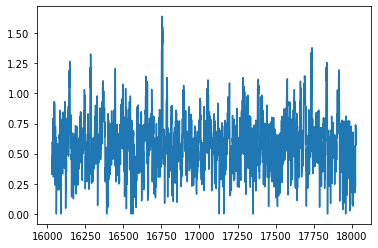

In [35]:
plt.plot(np.log1p(zavalki_df.query("month == 9")["износ"]))

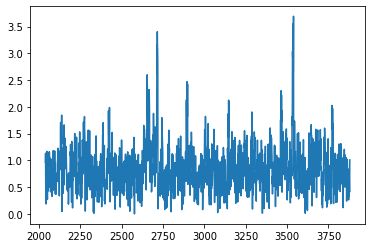

In [33]:
plt.plot(zavalki_df.query("month == 2")["износ"])

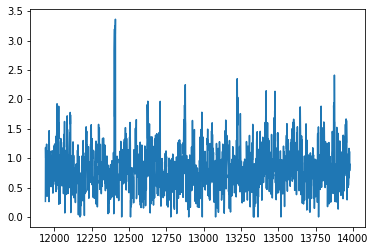

In [34]:
plt.plot(zavalki_df.query("month == 7")["износ"])

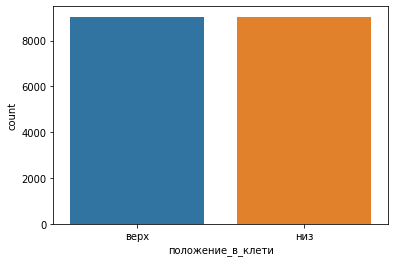

In [33]:
sns.countplot(zavalki_df["положение_в_клети"])

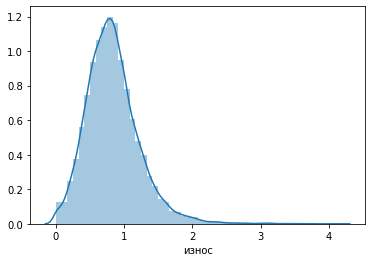

In [34]:
sns.distplot(zavalki_df["износ"])

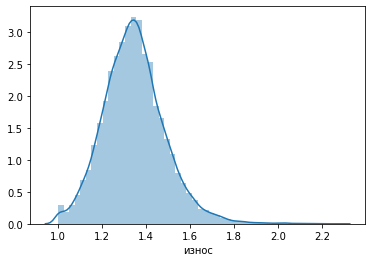

In [41]:
sns.distplot(np.sqrt(1 + zavalki_df["износ"]))

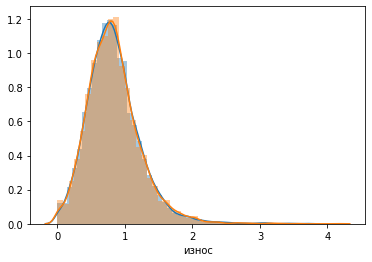

In [123]:
sns.distplot(zavalki_df.query("положение_в_клети == 'верх'")["износ"])
sns.distplot(zavalki_df.query("положение_в_клети == 'низ'")["износ"])

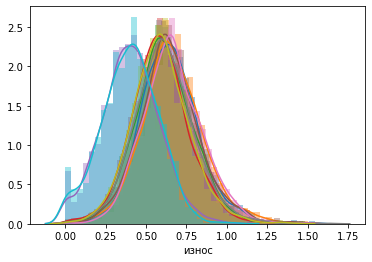

In [156]:
def f(x):
    return np.log(1 + x)

sns.distplot(f(zavalki_df.query("номер_клетки == 8 and положение_в_клети == 'верх'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 9 and положение_в_клети == 'верх'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 10 and положение_в_клети == 'верх'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 11 and положение_в_клети == 'верх'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 12 and положение_в_клети == 'верх'")["износ"]))

sns.distplot(f(zavalki_df.query("номер_клетки == 8 and положение_в_клети == 'низ'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 9 and положение_в_клети == 'низ'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 10 and положение_в_клети == 'низ'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 11 and положение_в_клети == 'низ'")["износ"]))
sns.distplot(f(zavalki_df.query("номер_клетки == 12 and положение_в_клети == 'низ'")["износ"]))

In [47]:
train = set(zavalki_df["номер_валка"])
test = set(test_df["номер_валка"])
print(train == test)

True


In [22]:
zavalki_df.head()

,дата_завалки,дата_вывалки,номер_клетки,положение_в_клети,номер_валка,износ
0,2018-01-01 00:14:45,2018-01-01 03:32:26,8,верх,222,0.684805
1,2018-01-01 00:14:45,2018-01-01 03:32:26,8,низ,260,0.614914
2,2018-01-01 00:14:45,2018-01-01 03:32:26,9,верх,410,1.135412
3,2018-01-01 00:14:45,2018-01-01 03:32:26,9,низ,57,0.516087
4,2018-01-01 00:14:45,2018-01-01 03:32:26,10,верх,273,0.657683


In [25]:
zavalki_df.shape

(18080, 6)

In [95]:
sample = zavalki_df.query("номер_валка == 391")

In [68]:
sample

,дата_завалки,дата_вывалки,номер_клетки,положение_в_клети,номер_валка,износ,month
524,2018-01-08 21:47:58,2018-01-09 01:37:04,10,низ,103,0.897486,1
548,2018-01-09 05:40:57,2018-01-09 09:03:47,8,низ,103,1.172052,1
1304,2018-01-20 17:18:09,2018-01-20 20:28:52,10,низ,103,0.757374,1
1971,2018-01-30 23:06:19,2018-01-31 02:40:04,12,верх,103,0.310969,1
2592,2018-02-09 10:40:29,2018-02-09 13:37:37,11,низ,103,0.543783,2
2980,2018-02-15 07:31:09,2018-02-15 11:14:57,12,верх,103,0.648386,2
3085,2018-02-16 20:14:30,2018-02-16 23:43:06,9,низ,103,0.574761,2
3941,2018-03-01 22:03:50,2018-03-02 01:35:54,11,верх,103,1.184704,3
4017,2018-03-02 23:03:35,2018-03-03 02:38:17,8,верх,103,0.862150,3
4325,2018-03-07 15:32:57,2018-03-07 19:04:48,10,верх,103,0.675051,3


In [58]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression()
xx = np.arange(len(sample))
lr.fit(xx[:, None], sample["износ"])
yy = lr.predict(xx[:, None])

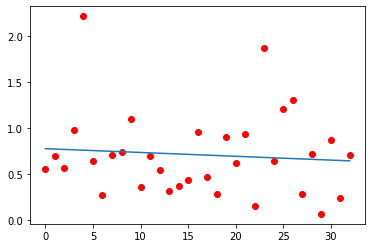

In [97]:
plt.plot(sample["износ"].values, "ro")
plt.plot(xx, yy)

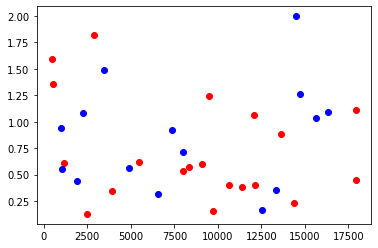

In [126]:
plt.plot(sample.query("положение_в_клети == 'верх'")["износ"], "ro")
plt.plot(sample.query("положение_в_клети == 'низ'")["износ"], "bo")

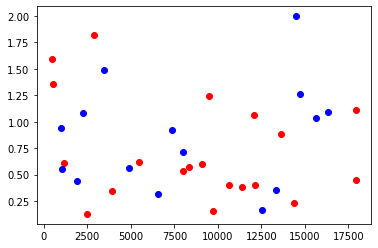

In [127]:
plt.plot(sample.query("положение_в_клети == 'верх'")["износ"], "ro")
plt.plot(sample.query("положение_в_клети == 'низ'")["износ"], "bo")

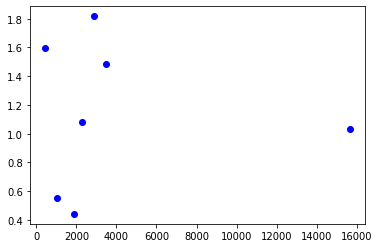

In [128]:
plt.plot(sample.query("номер_клетки == 8")["износ"], "bo")

In [8]:
from collections import Counter

In [9]:
cnt = Counter(zavalki_df["номер_валка"])

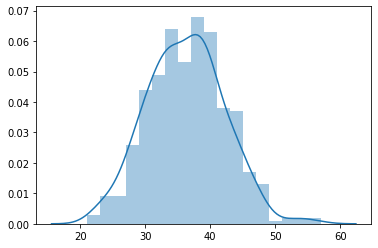

In [10]:
sns.distplot(list(cnt.values()))

In [11]:
cnt

Counter({222: 39,
         260: 38,
         410: 32,
         57: 25,
         273: 37,
         63: 30,
         42: 34,
         378: 40,
         234: 36,
         135: 41,
         368: 41,
         127: 43,
         312: 30,
         27: 33,
         496: 40,
         320: 37,
         284: 29,
         65: 34,
         199: 44,
         388: 43,
         26: 36,
         454: 35,
         305: 35,
         401: 46,
         141: 44,
         357: 43,
         362: 28,
         386: 38,
         62: 40,
         47: 38,
         329: 35,
         109: 32,
         72: 32,
         20: 32,
         49: 40,
         128: 47,
         479: 30,
         102: 46,
         81: 34,
         41: 40,
         330: 41,
         153: 44,
         335: 32,
         113: 29,
         207: 35,
         119: 37,
         5: 45,
         151: 40,
         286: 47,
         383: 47,
         325: 39,
         235: 30,
         321: 34,
         38: 37,
         139: 39,
         474: 41,
        

In [18]:
def agg(X):
    return X["дата_завалки"].min(), X["дата_вывалки"].max()

tmp = zavalki_df.groupby("номер_валка").apply(agg)
for i in range(len(tmp)):
    print(tmp[i + 1])

('2018-01-03 16:10:23', '2018-10-01 18:04:14')
('2018-01-17 20:40:55', '2018-09-18 04:58:35')
('2018-01-04 21:57:43', '2018-09-30 18:04:30')
('2018-01-07 05:17:27', '2018-09-27 17:51:41')
('2018-01-01 14:08:49', '2018-09-13 01:15:24')
('2018-01-03 16:10:23', '2018-09-24 03:52:04')
('2018-01-16 04:08:11', '2018-09-23 13:20:45')
('2018-01-04 06:38:20', '2018-09-21 05:55:24')
('2018-01-02 04:36:23', '2018-09-27 17:51:41')
('2018-01-07 20:19:58', '2018-09-29 20:41:58')
('2018-01-02 21:45:27', '2018-09-26 09:07:07')
('2018-01-02 08:19:26', '2018-09-29 01:47:54')
('2018-01-11 21:36:54', '2018-09-29 17:31:12')
('2018-01-09 09:19:44', '2018-09-22 04:28:14')
('2018-01-23 00:00:03', '2018-09-06 08:02:51')
('2018-01-02 01:07:22', '2018-09-25 11:32:27')
('2018-01-05 08:32:24', '2018-10-01 00:25:41')
('2018-01-07 01:57:29', '2018-09-29 01:47:54')
('2018-01-08 13:56:25', '2018-09-16 07:21:28')
('2018-01-01 10:41:40', '2018-09-30 10:38:51')
('2018-01-04 03:14:55', '2018-09-30 18:04:30')
('2018-01-02 

In [19]:
cnt = Counter(zavalki_df["дата_завалки"])

In [24]:
ruloni_df.query("Время_обработки <= '2018-01-01 03:32:26'")

,Марка,Масса,Толщина,Ширина,Время_обработки
0,Марка стали 22,27.26,2.90,1314,2018-01-01 00:14:45
1,Марка стали 109,21.62,3.80,1415,2018-01-01 00:16:58
2,Марка стали 109,22.78,3.80,1415,2018-01-01 00:19:06
3,Марка стали 109,13.76,3.80,1415,2018-01-01 00:21:21
4,Марка стали 109,27.21,3.80,1415,2018-01-01 00:21:59
5,Марка стали 109,10.60,3.80,1415,2018-01-01 00:23:27
6,Марка стали 109,10.92,3.80,1415,2018-01-01 00:25:57
7,Марка стали 105,23.62,2.08,1324,2018-01-01 00:26:50
8,Марка стали 105,19.30,2.08,1324,2018-01-01 00:29:15
9,Марка стали 105,20.00,2.08,1324,2018-01-01 00:30:56


In [71]:
# baseline: для каждого валка ответим его средним износом
mean_iznos = zavalki_df.groupby("номер_валка")["износ"].apply(np.mean).reset_index()

In [72]:
mean_iznos.head()

,номер_валка,износ
0,1,0.823613
1,2,0.795258
2,3,0.770624
3,4,0.862653
4,5,0.874031


In [76]:
train_pred = zavalki_df.merge(mean_iznos, on="номер_валка")

In [77]:
train_pred.head()

,дата_завалки,дата_вывалки,номер_клетки,положение_в_клети,номер_валка,износ_x,износ_y
0,2018-01-01 00:14:45,2018-01-01 03:32:26,8,верх,222,0.684805,0.932283
1,2018-01-22 02:09:21,2018-01-22 05:33:54,11,низ,222,1.039791,0.932283
2,2018-01-29 03:59:39,2018-01-29 07:21:18,8,низ,222,0.283263,0.932283
3,2018-02-08 13:38:09,2018-02-08 16:37:56,10,верх,222,0.738630,0.932283
4,2018-02-09 21:03:13,2018-02-10 00:10:08,9,низ,222,0.841612,0.932283


In [79]:
np.sqrt(((train_pred["износ_x"] - train_pred["износ_y"]) ** 2).sum() / len(train_pred))

0.3804780942845706

In [80]:
np.sqrt(((train_pred["износ_x"] - train_pred["износ_x"].mean()) ** 2).sum() / len(train_pred))

0.3928243418478657

In [105]:
sample_submission = pd.read_csv("../data/sample_test.csv")

In [106]:
sample_submission.head()

,id,iznos
0,0,1.01
1,1,1.01
2,2,1.01
3,3,1.01
4,4,1.01


In [107]:
test_pred = test_df.merge(mean_iznos, on="номер_валка").sort_values("id")

In [108]:
test_pred.head()

,id,дата_завалки,дата_вывалки,номер_клетки,положение_в_клети,номер_валка,износ
0,0,2018-10-01 18:15:54,2018-10-01 21:46:56,12,низ,199,0.986453
9,1,2018-10-01 18:15:54,2018-10-01 21:46:56,12,верх,445,0.973310
18,2,2018-10-01 18:15:54,2018-10-01 21:46:56,11,верх,284,0.706829
32,3,2018-10-01 18:15:54,2018-10-01 21:46:56,10,низ,172,0.852500
52,4,2018-10-01 18:15:54,2018-10-01 21:46:56,11,низ,275,0.684718


In [109]:
test_df.shape, test_pred.shape

((6060, 6), (6060, 7))

In [112]:
sample_submission["iznos"] = test_pred["износ"].values
sample_submission["id"] = test_pred["id"].values

In [117]:
sample_submission.head()

,id,iznos
0,0,0.986453
1,1,0.973310
2,2,0.706829
3,3,0.852500
4,4,0.684718


In [116]:
sample_submission.to_csv("../data/baseline.csv", index=False)

In [ ]:
#baseline 2: 